In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cellular Automata - Chain

In [2]:
class CA:
    def __init__(self, how_many_bits, rule_number, init_state=None, time=100):
        """Cellular Automata in a chain!
        
           Parameters:
           ----------
        
           how_many_bits : int
           
              It will give the size of the cellular automata's chain.
        
           rule_number : int 
              
              It will give the bits like array with length 8 that is the realm of the A.C.
           
           init_state : int
              
              If you don't want choose the initial state this will be chosen randomly.
                 
           time : int
              
              How many times the CA will evolve.
        """
        self.hmbits      = how_many_bits
        self.rule_number = rule_number
        self.state_0     = init_state
        self.time        = time
        
        self.initial_state = self.initial_state()
        self.evolution     = self.evolution()
        self.neighboors    = self.neighboors()
        
        self.CA            = self.all_interaction()
    
    def initial_state(self):
        """The initial state is the first peace that we need to study the evolution with same rule
        
              Return:
              ------ 
              
                 Array with length how_many_bits       
         """
        if self.state_0 == None:
            state = np.random.randint(0,2**8)
        else: state = self.state_0
        return [int(i) for i in np.binary_repr(int(state), width=self.hmbits)]
    
    def evolution(self):
        """Gives the rule and the matrix's rule
        
           Return:
           ------
              
               Array with length 8     
       """
        rule = [int(i) for i in np.binary_repr(self.rule_number,width=2**3)]
        return rule 
    
    def neighboors(self):
        """Gives matrix's rule which determine the neighboors
        
           Return:
           ------
              Matrix with shape(8,3)
           
       """
        matrix_rule = [[ int(x) for x in np.binary_repr(2**(3)-i-1, width=(3)) ] for i in range(8)]
        return matrix_rule
    
    
    """############################## Dynamics ##############################"""
    
    
    def boundery_cond(self, actual_state):
        """Get an array and includes one therm in a front and other in the tail
           
           exemplo :
           -------
              [1,2,3,4,5] -> [5,1,2,3,4,5,1]
           
           Parameters :
           ----------
        
           actual_state : array
        
              that is the CA that you want to evolve.

           Returns :
           -------
              return a array with length how_many_bits + 2
           
        """
        state                  = np.zeros(self.hmbits+2)
        state[0]               = actual_state[-1]
        state[1:self.hmbits+1] = actual_state
        state[-1]              = actual_state[0]
        return state
    
    def interaction(self, actual_state):
        """It will evolve one chain as per the rule
           
           Parameters :
           ----------
        
           actual_state : array
        
              that is the CA that you want to evolve alredy with boundary cond.

           Returns :
           -------
              return a new array with length how_many_bits
              
           exemplo :
           -------
              ["5",1,2,3,4,5,"1"] --> [2,4,5,3,1] "5" and "1" is the boundary cond  
           
        """
        state = self.boundery_cond(actual_state)
        newstate = np.zeros(self.hmbits)
        for i in range(self.hmbits):
            for j, k in enumerate( self.neighboors):
                if all(state[i:i+3] == k):
                    newstate[i] = self.evolution[j]   
        return newstate
    
    
    def all_interaction(self):
        """Use the self.interaction() and do self.time times
           
           
           Returns :
           -------
              return a matrix with shape( time , how_many_bits )
           
        """
        matrix = np.zeros((self.time+1,self.hmbits))
        actual_state = self.initial_state
        matrix[0] = actual_state

        for i in np.arange(1,self.time+1, 1):
            matrix[i] = self.interaction(matrix[i-1])
        return matrix


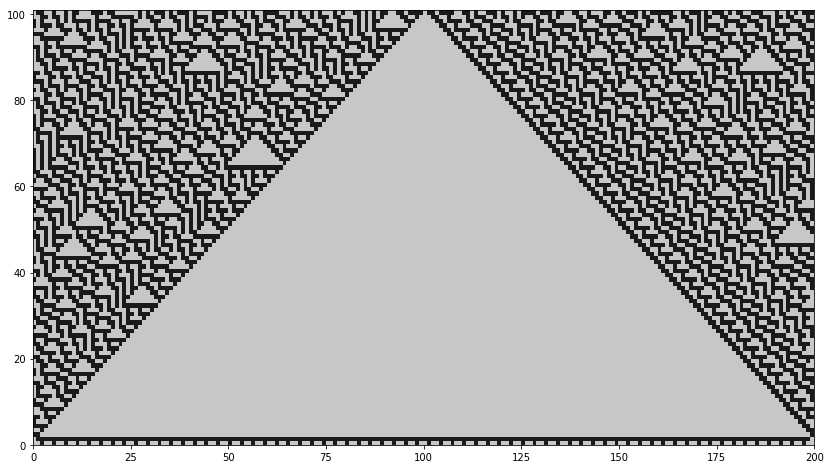

In [3]:
A=CA(how_many_bits=200, rule_number=30, init_state=229562577751284325077423156048737514646028999111827547900196, time=100).all_interaction()  
plt.figure(figsize=(14,8))
plt.pcolor(A,cmap="RdGy",vmin=-.2,vmax=0.1)
plt.show()

In [4]:
class Plot:
    def __init__(self, how_many_bits,  init_state=None, time=100):
        self.hmbits      = how_many_bits
        self.state_0     = init_state
        self.time        = time
        
    def plots(self):
        """It will save 256 png in the file"""
        ini_stat = 527675
        for i in range(2**8):
            plt.figure(figsize=(13,10))
            A = plt.pcolor(CA(self.hmbits,i, ini_stat, self.time).CA,cmap="RdBu",vmin=-.2,vmax=0.1)
            plt.title('rule = {}'.format(i))
            plt.ylabel('Evolution')
            plt.xlabel('size of the chain')
            plt.savefig('ca_'+str(int(i+100))+'.png')
        return
    
    def subplot(self):
        """It will plot 8 graph"""
        f = plt.figure(figsize=(20,22))
    
        ax1 = f.add_subplot(421)
        ax2 = f.add_subplot(422)
        ax3 = f.add_subplot(423)    
        ax4 = f.add_subplot(424)
        ax5 = f.add_subplot(425)
        ax6 = f.add_subplot(426)
        ax7 = f.add_subplot(427)
        ax8 = f.add_subplot(428)

        ran = np.random.randint(0,2**8)
        ax1.pcolor(CA(self.hmbits,ran, self.state_0, self.time).CA,cmap="RdBu",vmin=-.2,vmax=0.1)
        ax2.pcolor(CA(self.hmbits,13 , self.state_0, self.time).CA,cmap="RdGy",vmin=-.19,vmax=0.1)
        ax3.pcolor(CA(self.hmbits,18 , self.state_0, self.time).CA,cmap="RdGy",vmin=-.18,vmax=0.1)
        ax4.pcolor(CA(self.hmbits,22 , self.state_0, self.time).CA,cmap="RdGy",vmin=-.18,vmax=0.1)
        ax5.pcolor(CA(self.hmbits,30 , self.state_0, self.time).CA,cmap="RdGy",vmin=-.17,vmax=0.1)
        ax6.pcolor(CA(self.hmbits,50 , self.state_0, self.time).CA,cmap="RdGy",vmin=-.16,vmax=0.1)
        ax7.pcolor(CA(self.hmbits,110, self.state_0, self.time).CA,cmap="RdGy",vmin=-.15,vmax=0.1)
        ax8.pcolor(CA(self.hmbits,225, self.state_0, self.time).CA,cmap="RdGy",vmin=-.15,vmax=0.1)
    
        ax1.set_title('randomly rule = {}'.format(ran))
        ax2.set_title('rule = 13')
        ax3.set_title('rule = 18')
        ax4.set_title('rule = 22')
        ax5.set_title('rule = 30')
        ax6.set_title('rule = 50')
        ax7.set_title('rule = 110')
        ax8.set_title('rule = 225')

        ax1.set_ylabel('Evolution'),ax3.set_ylabel('Evolution'),ax5.set_ylabel('Evolution'),ax7.set_ylabel('Evolution')
        
        ax7.set_xlabel('size')
        ax8.set_xlabel('size')
        plt.savefig('momenta.png')
    
        return plt.show()

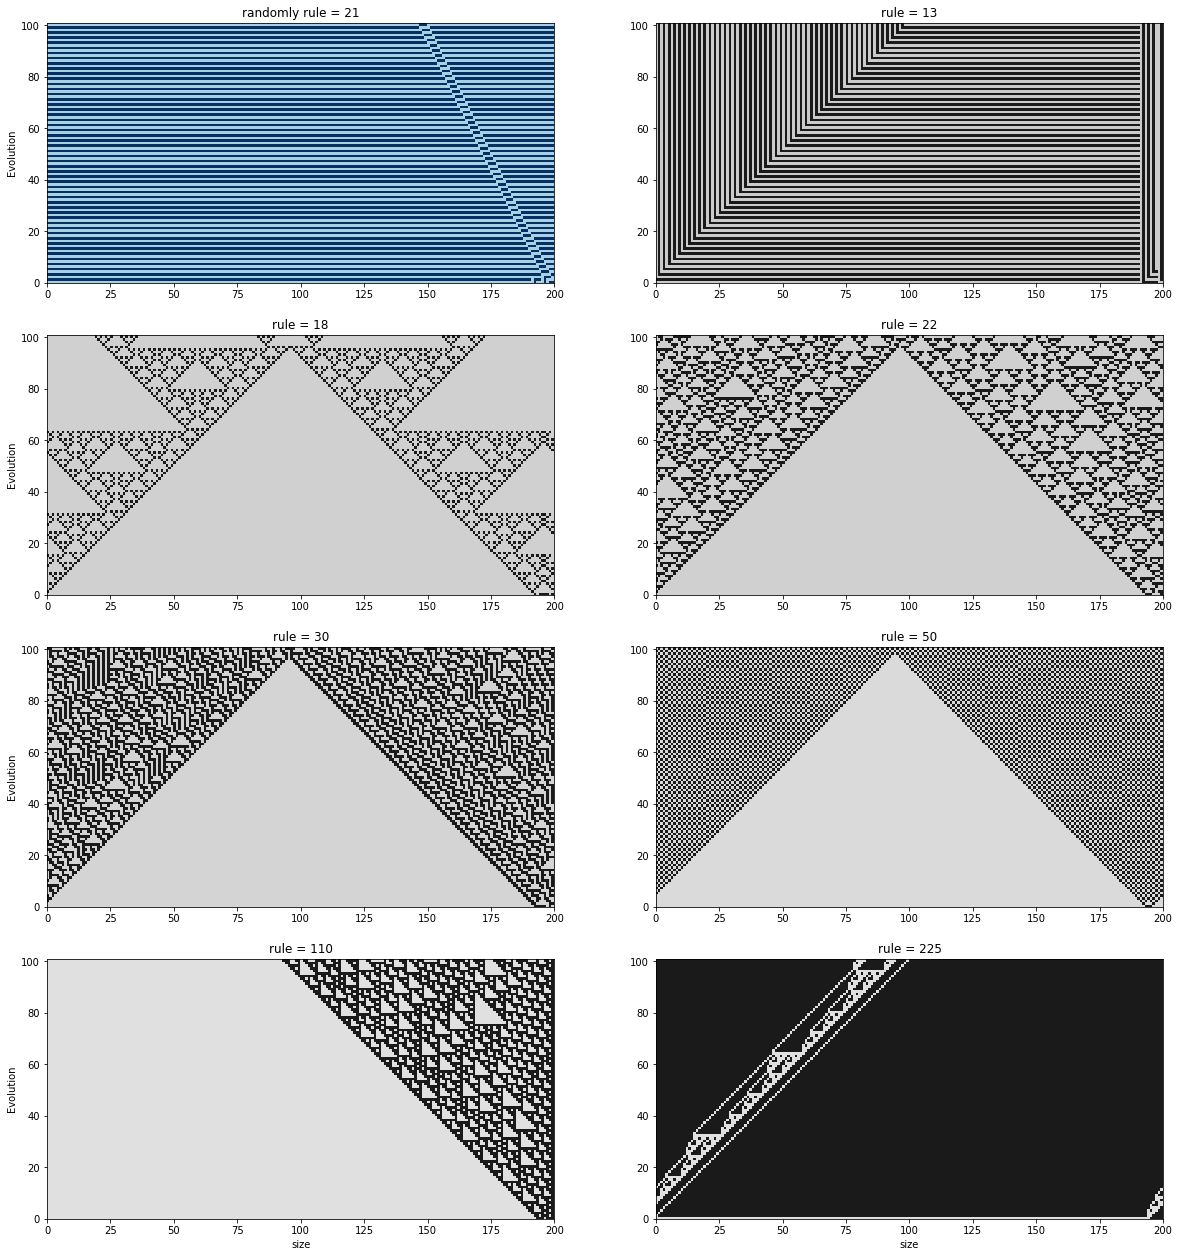

In [5]:
Plot(how_many_bits=200, init_state=None).subplot()